In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/project-dataset/final_data.xlsx


In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [65]:
import pandas as pd
from sklearn.utils import shuffle
from IPython.display import display, HTML
# Load the Excel file
file_path = '/kaggle/input/project-dataset/final_data.xlsx'

sheet_names = ['IA', 'VA', 'SpiA', 'PA', 'SA', 'EA']  

dataframes = []
for idx, sheet_name in enumerate(sheet_names):
    # Read the sheet
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    df['Aspect'] = idx 
    dataframes.append(df)

combined_df = pd.concat(dataframes, ignore_index=True)
if 'Table 1' in combined_df.columns:
    combined_df.drop(columns=['Table 1'], inplace=True)
combined_df.columns = ['text', 'Explanations', 'labels']
combined_df['Explanations'] = combined_df['Explanations'].str.replace('/', ',')
combined_df = shuffle(combined_df, random_state=42)
combined_df['text'] = combined_df['text'].astype(str).fillna("")
pd.set_option('display.max_columns', None) 

combined_df.head()

,text,Explanations,labels
51,“I’m beginning to think that it’s nothing to d...,mind,0
289,"I’ve been stuck in the same job for years, and...","stuck in the same job, not growing, not learning",1
677,"""If I told them I'm struggling with an eating ...","eating disorder,",3
1005,"“I made friends with a girl later in CIT, A an...","wasn't feeling it anymore, she’s now bullying me,",4
367,"""My inner turmoil often resembles a high-speed...","inner turmoil, causing chaos and fear, resembl...",2


In [10]:
#display(HTML(combined_df.to_html(index=False)))

In [66]:
print("Beyond Blue Dataset:")
print(combined_df.describe())

Beyond Blue Dataset:
            labels
count  1420.000000
mean      2.927465
std       1.565018
min       0.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000


In [68]:
from tabulate import tabulate
import nltk

results = []

combined_df['text_length'] = combined_df['text'].apply(lambda x: len(str(x).split()))

for category in combined_df['labels'].unique():
    beyondblue_subset = combined_df[combined_df['labels'] == category]

    # Calculate mean text length
    bb_mean_text_length = beyondblue_subset['text_length'].mean()
    results.append([category, f"{bb_mean_text_length:.2f}"])

headers = ["Category", "Beyond Blue Text Length Mean"]
print(tabulate(results, headers=headers, tablefmt="pretty"))

+----------+------------------------------+
| Category | Beyond Blue Text Length Mean |
+----------+------------------------------+
|    0     |            32.53             |
|    1     |            28.03             |
|    3     |            24.92             |
|    4     |            27.36             |
|    2     |            20.85             |
|    5     |            24.17             |
+----------+------------------------------+


In [16]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
def calculate_stats(df):
    # Word and sentence counts
    df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
    df['sentence_count'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(str(x))))
    
    # Total and maximum calculations
    total_posts = len(df)
    total_words = df['word_count'].sum()
    max_words = df['word_count'].max()
    total_sentences = df['sentence_count'].sum()
    max_sentences_post = df['sentence_count'].max()
    
    return total_posts, total_words, max_words, total_sentences, max_sentences_post

In [69]:
beyond_blue_stats = calculate_stats(combined_df)

table_data = [
    ["Metric", "Beyond Blue"],
    ["Number of Posts", beyond_blue_stats[0]],
    ["Total Number of Words", beyond_blue_stats[1]],
    ["Max. Number of Words", beyond_blue_stats[2]],
    ["Total Number of Sentences", beyond_blue_stats[3]],
    ["Max. Number of Sentences/Post", beyond_blue_stats[4]]
]

table = tabulate(table_data, headers="firstrow", tablefmt="grid")
print(table)

+-------------------------------+---------------+
| Metric                        |   Beyond Blue |
+===============================+===============+
| Number of Posts               |          1420 |
+-------------------------------+---------------+
| Total Number of Words         |         37082 |
+-------------------------------+---------------+
| Max. Number of Words          |           115 |
+-------------------------------+---------------+
| Total Number of Sentences     |          2271 |
+-------------------------------+---------------+
| Max. Number of Sentences/Post |             9 |
+-------------------------------+---------------+


In [21]:
# Function to calculate category distribution
def category_distribution(df, dataset_name):
    category_counts = df['labels'].value_counts()
    total_samples = len(df)
    distribution = pd.DataFrame({
        'Category': category_counts.index,
        'Count': category_counts.values,
        'Percentage': (category_counts.values / total_samples) * 100
    })
    return distribution

In [23]:
# Calculate category distribution
beyond_blue_distribution = category_distribution(combined_df, 'Beyond Blue')

print("Beyond Blue Dataset: number of samples for different aspects")
print(tabulate(beyond_blue_distribution, headers='keys', tablefmt='grid', showindex=False))

Beyond Blue Dataset: number of samples for different aspects
+------------+---------+--------------+
|   Category |   Count |   Percentage |
+============+=========+==============+
|          4 |     406 |      28.5915 |
+------------+---------+--------------+
|          3 |     296 |      20.8451 |
+------------+---------+--------------+
|          5 |     223 |      15.7042 |
+------------+---------+--------------+
|          2 |     190 |      13.3803 |
+------------+---------+--------------+
|          0 |     155 |      10.9155 |
+------------+---------+--------------+
|          1 |     150 |      10.5634 |
+------------+---------+--------------+


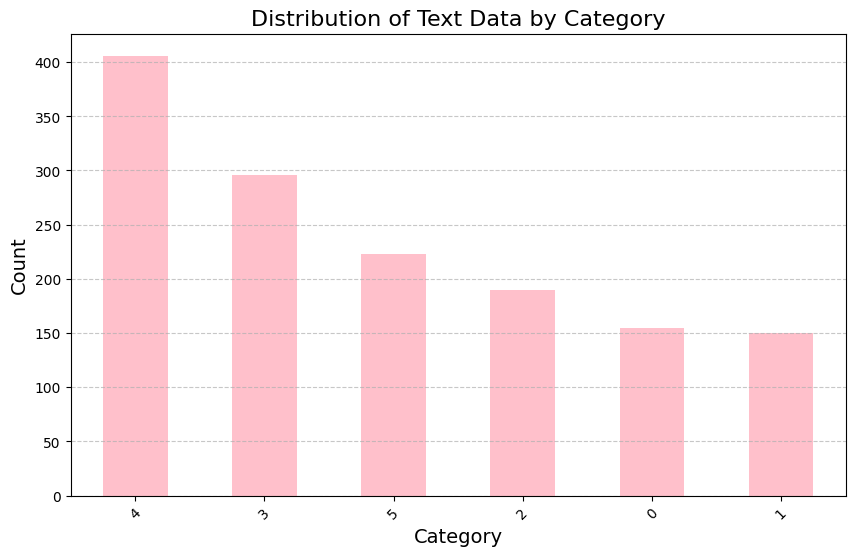

In [71]:
import matplotlib.pyplot as plt

# Count how much data belongs to each category
category_counts = combined_df['labels'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='pink')
plt.title('Distribution of Text Data by Category', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [40]:
from nltk.corpus import stopwords
from collections import Counter
from nltk.tokenize import word_tokenize

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
stop_words = set(stopwords.words('english'))
custom_stop_words = {"want", "i’m", "keep" "like", "know", "really","even","much", "really", "get", "thing", "things", "see", "make", "say", "go", "come", "take", "don’t","can’t","can't","going","feels","keep","making"}

all_stop_words = stop_words.union(custom_stop_words)

In [72]:
# Function to preprocess text by removing stop words and words with '/'
def preprocess_text(text):
    words = str(text).lower().split()
    return [word for word in words if word not in all_stop_words and '/' not in word]

In [31]:
def find_frequent_words(df, dataset_name):
    result = {}
    for category in df['labels'].unique():
        # Combine all text spans for the category
        text_spans = df[df['labels'] == category]['Explanations']
        # Tokenize and remove stop words and explanations with '/'
        words = []
        for span in text_spans:
            words.extend(preprocess_text(span))
        # Count word frequencies
        word_freq = Counter(words).most_common(10)  # Top 10 frequent words
        result[category] = word_freq
    return result

In [75]:
def prepare_frequent_words_table(frequent_words_dict, dataset_name):
    # Create a list of rows for the table
    rows = []
    for category, words in frequent_words_dict.items():
        # Combine words and their frequencies into one string
        word_freq_str = ", ".join([f"{word}({count})" for word, count in words])
        rows.append([category, word_freq_str])
    
    # Create DataFrame from the rows
    df = pd.DataFrame(rows, columns=['Category', 'Frequent Words (Frequency)'])
    return df

In [78]:
beyond_blue_frequent_words = find_frequent_words(combined_df, 'Beyond Blue')
beyond_blue_table = prepare_frequent_words_table(beyond_blue_frequent_words, 'Beyond Blue')

# beyond_blue_table = tabulate(beyond_blue_table, headers='keys', tablefmt='grid', showindex=False)
display(HTML(frequent_words_df.to_html(index=False)))

Category,Frequent Words (Frequency)
0,"future,(10), feel(9), hard,(9), feeling(7), thoughts,(7), lack(7), hard(6), think(6), struggling,(5), out,(5)"
1,"job,(25), work,(23), work(20), job(12), jobs,(8), money,(8), career,(7), financial(7), struggling,(6), unemployed,(6)"
3,"depression,(28), anxiety,(27), disorder,(17), sleep(16), anxiety(15), sleep,(14), diagnosed(14), bad(11), feel(11), self(11)"
4,"me,(48), feel(43), talk(21), like(21), one(19), alone,(18), people(18), friends(17), relationship(17), people,(17)"
2,"feel(40), life(17), life,(14), like(11), thoughts,(9), suicide,(8), anymore,(8), never(7), struggling(7), feeling(6)"
5,"feel(41), feeling(18), like(17), anxiety,(13), anxiety(10), me,(9), ,(8), sad,(8), crying,(7), hard(7)"


In [58]:
%pip install seaborn streamlit --quiet

Note: you may need to restart the kernel to use updated packages.


In [59]:
%pip install wordcloud textwrap --quiet

ERROR: Could not find a version that satisfies the requirement textwrap (from versions: none)
ERROR: No matching distribution found for textwrap
Note: you may need to restart the kernel to use updated packages.


In [81]:
# Importing necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textwrap import wrap
import pandas as pd

# Assuming your dataset is in a DataFrame called 'df' with columns 'text' and 'category'

# Function to generate word cloud from text
def generate_wordcloud(text, title):
    wc = WordCloud(width=800, height=600, background_color="white", max_words=150, colormap="Dark2").generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title('\n'.join(wrap(title, 60)), fontsize=14)
    plt.show()

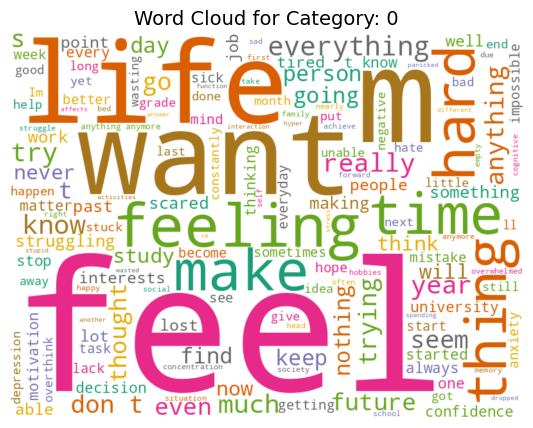

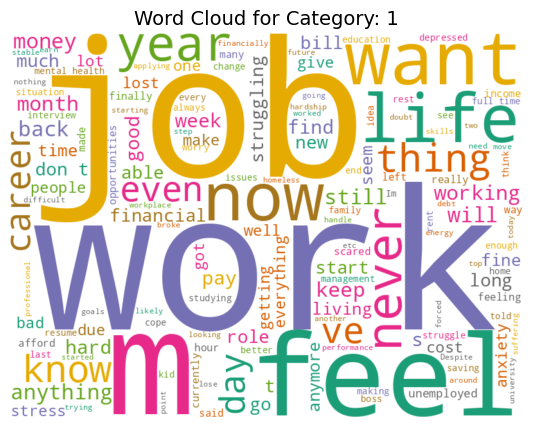

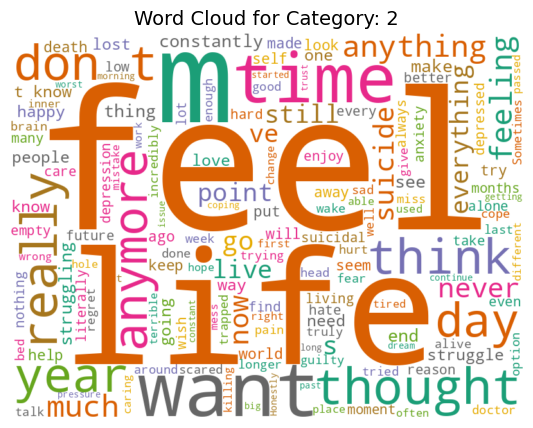

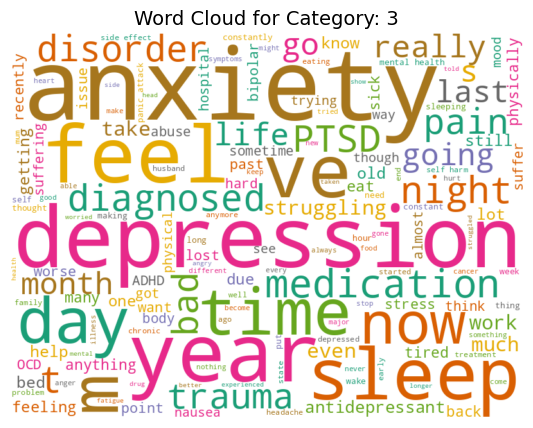

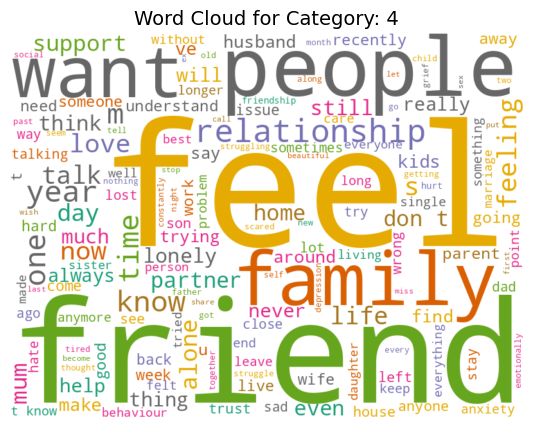

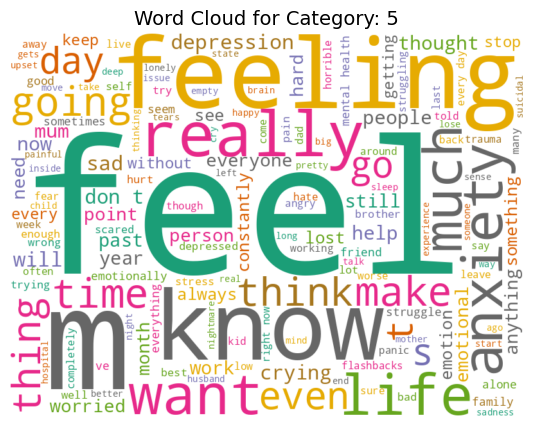

In [82]:
# Grouping the dataset by category and concatenating the text for each category
grouped_data = combined_df.groupby('labels')['text'].apply(lambda x: ' '.join(x)).reset_index()

# Generate a word cloud for each category
for index, row in grouped_data.iterrows():
    category = row['labels']
    text = row['text']
    generate_wordcloud(text, f"Word Cloud for Category: {category}")

In [84]:
combined_df.shape

(1420, 6)

In [85]:
combined_df

,text,Explanations,labels,text_length,word_count,sentence_count
51,“I’m beginning to think that it’s nothing to d...,mind,0,15,15,2
289,"I’ve been stuck in the same job for years, and...","stuck in the same job, not growing, not learning",1,20,20,1
677,"""If I told them I'm struggling with an eating ...","eating disorder,",3,19,19,1
1005,"“I made friends with a girl later in CIT, A an...","wasn't feeling it anymore, she’s now bullying me,",4,55,55,2
367,"""My inner turmoil often resembles a high-speed...","inner turmoil, causing chaos and fear, resembl...",2,16,16,1
...,...,...,...,...,...,...
1095,"""I tried everything but she is refusing to talk.""",she is refusing to talk,4,9,9,1
1130,"“God knows I love him so, but I sometimes feel...",Sometimes feel like I don’t even know this per...,4,17,17,1
1294,"""It's so painful writing this out, it just fee...","so painful, feels like there’s a big hole in m...",5,22,22,1
860,“I have hardly been out of the house and have ...,"Have not made any friends here,",4,33,33,2


In [88]:
combined_df.drop(columns = ['text_length','word_count','sentence_count'], inplace = True)

In [89]:
combined_df

,text,Explanations,labels
51,“I’m beginning to think that it’s nothing to d...,mind,0
289,"I’ve been stuck in the same job for years, and...","stuck in the same job, not growing, not learning",1
677,"""If I told them I'm struggling with an eating ...","eating disorder,",3
1005,"“I made friends with a girl later in CIT, A an...","wasn't feeling it anymore, she’s now bullying me,",4
367,"""My inner turmoil often resembles a high-speed...","inner turmoil, causing chaos and fear, resembl...",2
...,...,...,...
1095,"""I tried everything but she is refusing to talk.""",she is refusing to talk,4
1130,"“God knows I love him so, but I sometimes feel...",Sometimes feel like I don’t even know this per...,4
1294,"""It's so painful writing this out, it just fee...","so painful, feels like there’s a big hole in m...",5
860,“I have hardly been out of the house and have ...,"Have not made any friends here,",4


In [8]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

encoded_inputs = tokenizer(list(combined_df['text']), padding=True, truncation=True, return_tensors="pt")

print(encoded_inputs)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

{'input_ids': tensor([[ 101, 1523, 1045,  ...,    0,    0,    0],
        [ 101, 1045, 1521,  ...,    0,    0,    0],
        [ 101, 1000, 2065,  ...,    0,    0,    0],
        ...,
        [ 101, 1000, 2009,  ...,    0,    0,    0],
        [ 101, 1523, 1045,  ...,    0,    0,    0],
        [ 101, 1523, 2023,  ...,    0,    0,    0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}


In [91]:
print(combined_df['text'].apply(type).value_counts())

text
<class 'str'>    1420
Name: count, dtype: int64


In [92]:
# Drop the index column
combined_df.reset_index(drop=True, inplace=True)

In [93]:
combined_df.head()

,text,Explanations,labels
0,“I’m beginning to think that it’s nothing to d...,mind,0
1,"I’ve been stuck in the same job for years, and...","stuck in the same job, not growing, not learning",1
2,"""If I told them I'm struggling with an eating ...","eating disorder,",3
3,"“I made friends with a girl later in CIT, A an...","wasn't feeling it anymore, she’s now bullying me,",4
4,"""My inner turmoil often resembles a high-speed...","inner turmoil, causing chaos and fear, resembl...",2


In [96]:
combined_df.isnull().sum()

text            0
Explanations    4
labels          0
dtype: int64

In [95]:
combined_df.to_csv('wellness_project_dataset.csv')

In [97]:
from huggingface_hub import login
login()

In [98]:
# Split into train, validation, and test sets (e.g., 70% train, 15% validation, 15% test)
train_frac = 0.7
valid_frac = 0.15
test_frac = 0.15

train_size = int(train_frac * len(combined_df))
valid_size = int(valid_frac * len(combined_df))

train_df = combined_df[:train_size]
valid_df = combined_df[train_size:train_size + valid_size]
test_df = combined_df[train_size + valid_size:]

In [99]:
# Convert to Hugging Face Dataset format
from datasets import Dataset, DatasetDict

train_ds = Dataset.from_pandas(train_df)
valid_ds = Dataset.from_pandas(valid_df)
test_ds = Dataset.from_pandas(test_df)

# Combine into a DatasetDict
dataset_dict = DatasetDict({
    'train': train_ds,
    'validation': valid_ds,
    'test': test_ds
})

# Your balanced dataset is now ready in Hugging Face format
print(dataset_dict)

DatasetDict({
    train: Dataset({
        features: ['text', 'Explanations', 'labels'],
        num_rows: 993
    })
    validation: Dataset({
        features: ['text', 'Explanations', 'labels'],
        num_rows: 213
    })
    test: Dataset({
        features: ['text', 'Explanations', 'labels'],
        num_rows: 214
    })
})


In [100]:
# push data to hub
dataset_dict.push_to_hub("hebashakeel/wellness_project_dataset")

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/hebashakeel/wellness_project_dataset/commit/d7b88d0aa0f53033f631fb08627ed9b453b15d9f', commit_message='Upload dataset', commit_description='', oid='d7b88d0aa0f53033f631fb08627ed9b453b15d9f', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/hebashakeel/wellness_project_dataset', endpoint='https://huggingface.co', repo_type='dataset', repo_id='hebashakeel/wellness_project_dataset'), pr_revision=None, pr_num=None)